In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

     Unnamed: 0                  boat
0             0  (182, 104, 213, 134)
1             1  (221, 109, 252, 139)
2             2  (235, 114, 266, 144)
3             3  (250, 119, 281, 149)
4             4  (273, 133, 304, 163)
..          ...                   ...
282         282  (225, 316, 256, 346)
283         283  (335, 316, 366, 346)
284         284  (109, 402, 140, 432)
285         285  (125, 410, 156, 440)
286         286  (138, 412, 169, 442)

[287 rows x 2 columns]


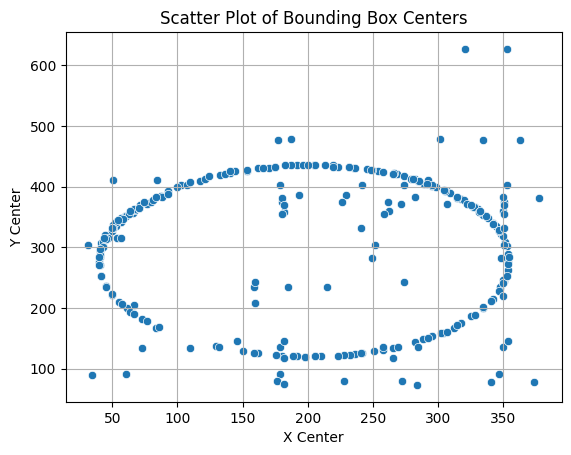

In [19]:

df_boat = pd.read_csv("/media/scripter/share_1TB/Work/Corsairs-bot/boat_positions.csv")

print(df_boat)


# Extract bounding box centers
def extract_center(box_str):

    numbers = list(map(int, re.findall(r'\d+', box_str)))

    # Calculate center coordinates
    x_center = (numbers[0] + numbers[2]) / 2
    y_center = (numbers[1] + numbers[3]) / 2
    return pd.Series([x_center, y_center])



df_boat[['x_center', 'y_center']] = df_boat['boat'].apply(extract_center)


# Create scatter plot using Seaborn
sns.scatterplot(x='x_center', y='y_center', data=df_boat)


# Show the plot
plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Scatter Plot of Bounding Box Centers')
plt.grid(True)
plt.show()

     Unnamed: 0            cannonball
0             0  (187, 574, 203, 590)
1             1  (199, 552, 215, 568)
2             2  (234, 271, 250, 287)
3             3  (186, 574, 202, 590)
4             4  (199, 551, 215, 567)
..          ...                   ...
973         973  (199, 551, 215, 567)
974         974    (37, 317, 53, 333)
975         975  (128, 322, 144, 338)
976         976  (186, 574, 202, 590)
977         977  (199, 551, 215, 567)

[978 rows x 2 columns]


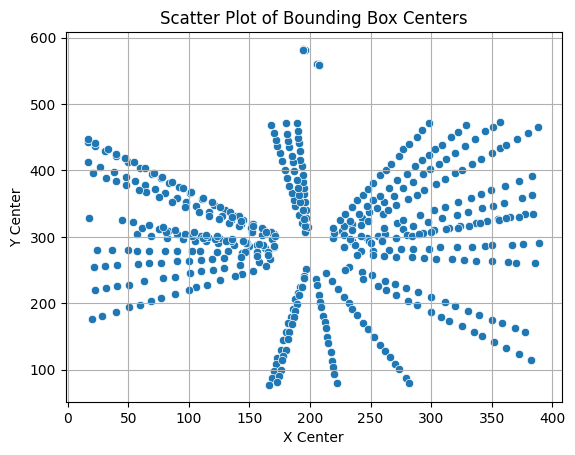

In [20]:

df_bullet = pd.read_csv("/media/scripter/share_1TB/Work/Corsairs-bot/cannonball_positions.csv")

print(df_bullet)


# Extract bounding box centers
def extract_center(box_str):

    numbers = list(map(int, re.findall(r'\d+', box_str)))

    # Calculate center coordinates
    x_center = (numbers[0] + numbers[2]) / 2
    y_center = (numbers[1] + numbers[3]) / 2
    return pd.Series([x_center, y_center])



df_bullet[['x_center', 'y_center']] = df_bullet['cannonball'].apply(extract_center)


# Create scatter plot using Seaborn
sns.scatterplot(x='x_center', y='y_center', data=df_bullet)


# Show the plot
plt.xlabel('X Center')
plt.ylabel('Y Center')
plt.title('Scatter Plot of Bounding Box Centers')
plt.grid(True)
plt.show()

In [21]:
df_bullet[['x_center', 'y_center']]

,x_center,y_center
0,195.0,582.0
1,207.0,560.0
2,242.0,279.0
3,194.0,582.0
4,207.0,559.0
...,...,...
973,207.0,559.0
974,45.0,325.0
975,136.0,330.0
976,194.0,582.0


In [26]:
points = df_bullet[['x_center', 'y_center']].to_numpy()


In [31]:
import itertools

In [28]:
points.shape

(978, 2)

In [39]:
min_distance = float('inf')
closest_pair = (None, None)

# Calculate pairwise L2 norms (Euclidean distances)
for i in range(len(points)):
    for j in range(i + 1, len(points)):
        point1 = points[i]
        point2 = points[j]
        distance = np.linalg.norm(point1 - point2)  # Calculate L2 norm
        if distance < min_distance and distance != 0:
            min_distance = distance
            closest_pair = (point1, point2)

# Output the closest pair of points with the smallest non-zero distance
if closest_pair[0] is not None and closest_pair[1] is not None:
    print(f"The closest pair of points are:")
    print(f"Point 1: {closest_pair[0]}")  # Coordinates of the first point
    print(f"Point 2: {closest_pair[1]}")  # Coordinates of the second point
    print(f"Minimum Distance: {min_distance:.2f}")
else:
    print("No valid pair found.")

The closest pair of points are:
Point 1: [195. 582.]
Point 2: [195. 582.]
Minimum Distance: 0.00
